# Assignment 4

## Objective of this assignment
The objective of this exercise is to understand how the unsupervised learning methods $k$-means clustering and hierarchical clustering work. Upon completing the exercise you should also understand how the choice of number of clusters, distance metrics and linkage functions can impact the solutions obtained and further be able to interpret dendrograms and measures of cluster validity

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 8.1-8.3 and 8.5.7


## Additional Tools
For this exercise you will need to load the provided *clusterPlot.py* and *clusterVal.py* scripts. 


## Introduction
In previous exercises we considered supervised learning, i.e., we were given both input data **X** and output values **Y**. We now move on to unsupervised learning where we are only provided input data **X**. The aim is here to find common patterns in the data such as groups of observations that are similar in some sense. In this exercise we will consider two clustering approaches for unsupervised learning: *k*-means clustering and hierarchical clustering.


## 4.1 *k*-means clustering
In this part of the exercise we will investigate *k*-means clustering. In *k*-means each of the data points are assigned to the cluster in closest proximity according to some measure of distance between cluster centers and data points. When the distance is given by the squared euclidian distance, the centers are also called centroids. Once the data points have been assigned, each cluster center is updated to be placed at the center of the data points that are assigned to the cluster. This continues iteratively, usually until the assignment of data points to centers no longer changes or until a maximal number of iterations is reached.

> 4.1.1a (1 point) Load the *synth1* data into python using the *loadmat* function. Cluster the data into *K = 4* clusters using the *k*-means algorithm. Make a scatter plot of the data and the clustering using the provided *clusterPlot()* function.
 + *In Python, you can use the function k_means() from the package sklearn.cluster to compute *k*-means clustering.*
 + *Type clusterPlot(X,clusters,centroids,y) to plot the data and the clustering. Don't forget to import the function from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*


dict_keys(['__header__', '__version__', '__globals__', 'classNames', 'C', 'X_test', 'X_train', 'y_test', 'y_train', 'attributeNames', 'M', 'N_train', 'N_test', 'X', 'y', 'N'])


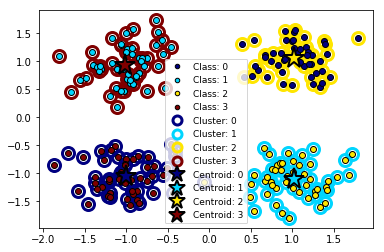

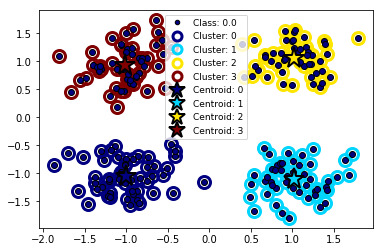

In [50]:
##Answer to question 4.1.1a
from scipy.io import loadmat
import sklearn.cluster
import Toolbox.clusterPlot as cp


synth1 = loadmat('./Data/synth1.mat')

#print (synth1)
'''
print (synth1['__header__'])
print (synth1['__version__'])
print (synth1['__globals__'])
print (synth1['classNames'])
print (synth1['X_test'])
'''
#keys = synth1.keys()
print (keys)

rslt = sklearn.cluster.k_means(synth1['X'],4)

rslt

cp.clusterPlot(synth1['X'],rslt[1],rslt[0],synth1['y'])
plt.show()
cp.clusterPlot(synth1['X'],rslt[1],rslt[0])



> 4.1.1b (1 point) Try also to cluster and plot the data sets *synth2*, *synth3*, and *synth4* with the same number of *K*. Does the clustering coincide with the true classes? Explain for every data set. 

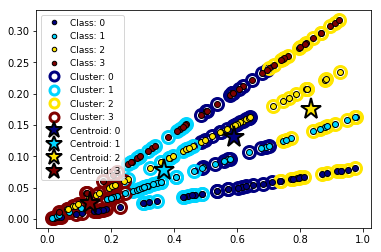

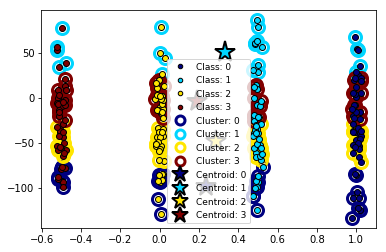

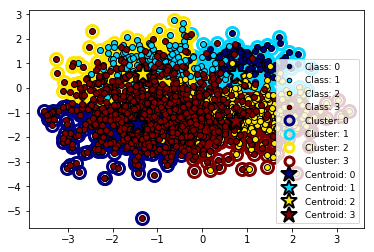

In [57]:
##Answer to question 4.1.1b
##Answer to question 4.1.1a
from scipy.io import loadmat
import sklearn.cluster
import Toolbox.clusterPlot as cp


synth2 = loadmat('./Data/synth2.mat')
synth3 = loadmat('./Data/synth3.mat')
synth4 = loadmat('./Data/synth4.mat')

rslt2 = sklearn.cluster.k_means(synth2['X'],4)
rslt3 = sklearn.cluster.k_means(synth3['X'],4)
rslt4 = sklearn.cluster.k_means(synth4['X'],4)

cp.clusterPlot(synth2['X'],rslt2[1],rslt2[0],synth2['y'])
plt.show()
cp.clusterPlot(synth3['X'],rslt3[1],rslt3[0],synth3['y'])
plt.show()
cp.clusterPlot(synth4['X'],rslt4[1],rslt4[0],synth4['y'])





*Double click to type your answer for 4.1.1b here:*

Each of the data sets synth2, synth3 and synth4 are not apporiate for k-means. K-means had created clusters that do not coincide with the true classes.

Synth2's classes are defined by linear relationships of their attributes. e.g. y = mx + c, where m is different for each cluster.

Synth3's classes are defined by the range of their x-coordinate. 

Synth4 has a greate deal of overlap of classes in terms of where the data points are in cartesian space. In other words, the classes are interwined.

********************************************************************************************

Rather than using the error rate we will consider the supervised measures of cluster validity described in *Introduction to Data Mining* section 8.5.7, in particular the entropy, purity, rand statistic, and Jaccard coefficient. Carefully review these measures in the book and make sure you understand how they are calculated.

> 4.1.2a (1 point) Repeat Exercise 4.1.1, but this time perform *k*-means clustering for *K = 1, ..., 10* clusters. For each value of *K* compute the four cluster validity measures mentioned above. Plot the cluster validity measures as a function of *K*
 + *Use the clusterVal() function to compute the cluster validity. Don't forget to import it from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*

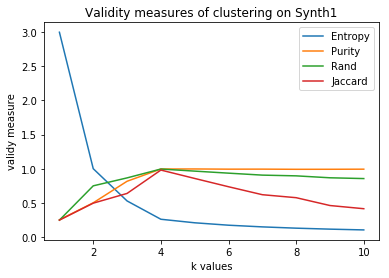

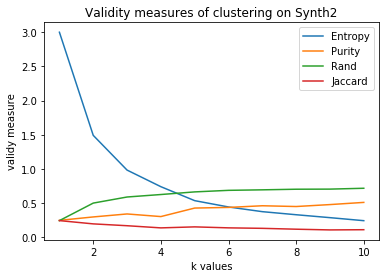

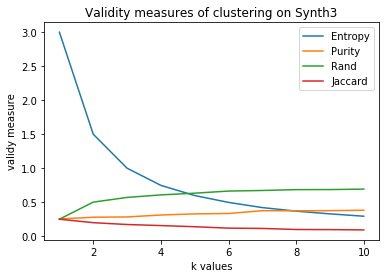

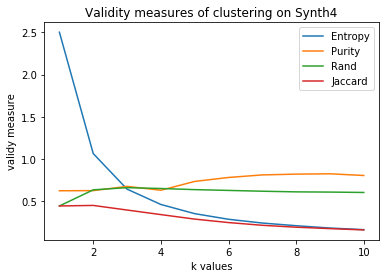

In [6]:
##Answer to question 4.1.2a

##Answer to question 4.1.1a
from scipy.io import loadmat
import sklearn.cluster
import Toolbox.clusterPlot as cp
import Toolbox.clusterVal as cv
import numpy as np
import matplotlib.pyplot as plt


synth1 = loadmat('./Data/synth1.mat')

#results = []
clusterVal = []

for i in range(10):
    rslt = sklearn.cluster.k_means(synth1['X'],i+1) #generate k_means for k = 1 ... 10
    #results.append(rslt)
    clusterVal.append(cv.clusterVal(synth1['y'],rslt[1])) #compute cluster validity

x_vals = np.arange(10)+1
lineObjects = plt.plot(x_vals, clusterVal)
plt.ylabel('validy measure')
plt.xlabel('k values')
plt.title("Validity measures of clustering on Synth1")
plt.legend(lineObjects, ('Entropy', 'Purity', 'Rand', 'Jaccard'))
plt.show()

# All this code was unneccessary. I made it before I thought of trying to just give matplotlob the raw result
'''
synth1_clusterVal_array = np.array(synth1_clusterVal) #convert data into nparray
entropy = synth1_clusterVal_array[0:10,0]
purity = synth1_clusterVal_array[:,1]
rand = synth1_clusterVal_array[:,2]
jaccard = synth1_clusterVal_array[:,3]
x_vals = np.arange(10)+1
'''

synth = loadmat('./Data/synth2.mat')

clusterVal = []

for i in range(10):
    rslt = sklearn.cluster.k_means(synth['X'],i+1) #generate k_means for k = 1 ... 10
    #results.append(rslt)
    clusterVal.append(cv.clusterVal(synth['y'],rslt[1])) #compute cluster validity

x_vals = np.arange(10)+1
lineObjects = plt.plot(x_vals, clusterVal)
plt.ylabel('validy measure')
plt.xlabel('k values')
plt.title("Validity measures of clustering on Synth2")
plt.legend(lineObjects, ('Entropy', 'Purity', 'Rand', 'Jaccard'))
plt.show()

synth = loadmat('./Data/synth3.mat')
clusterVal = []

for i in range(10):
    rslt = sklearn.cluster.k_means(synth['X'],i+1) #generate k_means for k = 1 ... 10
    #results.append(rslt)
    clusterVal.append(cv.clusterVal(synth['y'],rslt[1])) #compute cluster validity

x_vals = np.arange(10)+1
lineObjects = plt.plot(x_vals, clusterVal)
plt.ylabel('validy measure')
plt.xlabel('k values')
plt.title("Validity measures of clustering on Synth3")
plt.legend(lineObjects, ('Entropy', 'Purity', 'Rand', 'Jaccard'))
plt.show()

synth = loadmat('./Data/synth4.mat')
clusterVal = []

for i in range(10):
    rslt = sklearn.cluster.k_means(synth['X'],i+1) #generate k_means for k = 1 ... 10
    #results.append(rslt)
    clusterVal.append(cv.clusterVal(synth['y'],rslt[1])) #compute cluster validity

x_vals = np.arange(10)+1
lineObjects = plt.plot(x_vals, clusterVal)
plt.ylabel('validy measure')
plt.xlabel('k values')
plt.title("Validity measures of clustering on Synth4")
plt.legend(lineObjects, ('Entropy', 'Purity', 'Rand', 'Jaccard'))
plt.show()




> 4.1.2b (1 point) How can the cluster validity measures be used to select the best number of clusters?

    Choose the number of clusters that maximises the validity according to a measure that has the properties that you would think are appropriate. 

> What happens when more than four clusters are used to model the data?

    Generally speaking, after four clusters, the validity measures diverge rather than converge. However, even though they diverge, the rate of change of validity for each additional cluster is slowed.

*Double click to type your answer for 4.1.2b here:*

*k*-means clustering has many different applications, one of which is data compression. A data set can be compressed by performing *k*-means clustering and then representing each data object by its cluster center. Thus, the only data that need to be stored are the *K* cluster centers and the *N* cluster indices.

> 4.1.3a (1 point) We will consider a subset of the wild faces data described in berg2005[1]. Load the wildfaces data, *Data/wildfaces* using the *loadmat* function. Each data object is a $40 \times 40 \times 3 = 4800$ dimensional vector, corresponding to a 3-color $40 \times 40$ pixels image. Compute a *k*-means clustering of the data with *K = 10* clusters. Plot a few random images from the data set as well as their corresponding cluster centroids to see how they are represented.
+ You can plot an image by the command imshow(np.reshape(X[k,:],(c,x,y)).T) which reshapes an image vector to a 3-dimensional array and plots it. You can plot the cluster centroids in a similar manner.


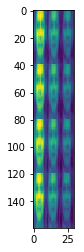

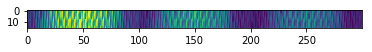

In [23]:
##Answer to question 4.1.3a

wildfaces = loadmat('./Data/wildfaces.mat')

rslt = sklearn.cluster.k_means(wildfaces['X'],10)[0]

plt.imshow(np.reshape(rslt[0,:],(30,-1)).T)
plt.show()

plt.imshow(np.reshape(rslt[0,:],(300,-1)).T)
plt.show()



> 4.1.3b (1 point) How well is the data represented by the cluster centroids? Are you able to recognize the faces in the compressed representation? What happens if you increase or decrease the number of clusters?

In [ ]:
##Answer to question 4.1.3b

*Double click to type your answer for 4.1.3b here:*

> 4.1.4a (1 point) Repeat the exercise with the digits data set. Load the digits data set from Data/digits. Each data object is a $16 \times 16 = 256$ dimensional vector, corresponding to a gray scale $16 \times 16$ pixels image.
+ You can change the color map to black-on-white gray-scale by adding the parameter cmap=cm.binary to the function imshow().

In [4]:
##Answer to question 4.1.4a

> 4.1.4b (1 point) Why does running *k*-means with *K = 10* not give you 10 clusters corresponding to the 10 digits *0..9*? How many clusters do you need to visually represent the 10 different digits? Are there any digits that the clustering algorithm seems to confuse more than others and can you explain why?

In [ ]:
##Answer to question 4.1.4b

*Double click to type your answer for 4.1.3b here:*

## 4.2 Hierarchical Clustering

In this part of the exercie we will consider hierarchical clustering based on the functions from the package *scipy.cluster.hierarchy*. The function *linkage()* forms a sample to sample distance matrix according to a given distance metric, and creates the linkages between data points forming the hierarchical cluster tree. The function *dendrogram* creates a plot of the generated tree. The function *fcluster* extracts the cluster from a linkage matrix w.r.t. a given criterion. Use *help* for the three functions (or read the online documentation) and inspect what distance metrics and linkage functions are implemented.

> 4.2.1a (1 point) Load the data set from *Data/synth1*. Cluster the data using hierarchical clustering with single linkage using the Euclidean distance measure. Cluster the data into 4 clusters by cutting off the dendrogram at a threshold. Plot a dendrogram and a scatter plot of the clusters.
+ The function *linkage()* computes the hierarchical clustering, resulting in a matrix representing the hierarchy of clusterings. Type help(linkage) (or read the online documentation) to learn how to use it.
+ You can e.g. type *Z = linkage(X, method='single', metric='euclidean')* to use single linkage with the Euclidean distance measure.
+ To compute a clustering, you can use the function*fcluster()*. For example, type *cls = fcluster(Z, criterion='maxclust', t=4)* to get a maximum of 4 clusters. Type *help(fcluster)* (or read the online documentation) to learn more about what this function does.
+ To plot a dendrogram, you can use the *dendrogram()* function
+ Again, you can use the function *clusterplot()* to plot a scatter plot of the clustering.

In [ ]:
##Answer to question 4.2.1a

> 4.2.1b (1 point) Change the linkage methods (single, complete, average) and explain how this changes the dendrogram.
Then plot a dendrogram and a scatterplot of the clusters for the *synth2*, *synth3*, and *synth4* data sets..

In [ ]:
##Answer to question 4.2.1b

*Double click to type your answer for 4.1.3b here:*

## References
1. Tamara L Berg, Alexander C Berg, Jaety Edwards, and DA Forsyth. Who's in the
picture. *Advances in Neural Information Processing Systems*, 17:137-144, 2005.